In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Plotting settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:.4f}')

## 1. Dataset Overview & Basic Information

**What we're checking:**
- Dataset dimensions (rows × columns)
- Memory usage
- Data types of each feature
- First/last rows preview

**Why it matters:**
- Understand the scale of data
- Identify potential memory optimization needs
- Verify data loaded correctly

In [2]:
# Load data
PROBLEM_NUM = 36

X_train = pd.read_csv(f'./data_31_40/problem_{PROBLEM_NUM}/dataset_{PROBLEM_NUM}.csv')
y_train = pd.read_csv(f'./data_31_40/problem_{PROBLEM_NUM}/target_{PROBLEM_NUM}.csv')
X_eval = pd.read_csv(f'./data_31_40/problem_{PROBLEM_NUM}/EVAL_{PROBLEM_NUM}.csv')

print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nTraining Features Shape: {X_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Evaluation Features Shape: {X_eval.shape}")
print(f"\nTotal Features: {X_train.shape[1]}")
print(f"Total Training Samples: {X_train.shape[0]}")
print(f"Total Evaluation Samples: {X_eval.shape[0]}")

DATASET OVERVIEW

Training Features Shape: (10000, 273)
Training Target Shape: (10000, 2)
Evaluation Features Shape: (10000, 273)

Total Features: 273
Total Training Samples: 10000
Total Evaluation Samples: 10000


In [3]:
# Memory usage
print("\n" + "="*80)
print("MEMORY USAGE")
print("="*80)
print(f"\nX_train memory: {X_train.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"y_train memory: {y_train.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"X_eval memory: {X_eval.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nTotal memory: {(X_train.memory_usage(deep=True).sum() + y_train.memory_usage(deep=True).sum() + X_eval.memory_usage(deep=True).sum()) / 1024**2:.2f} MB")


MEMORY USAGE

X_train memory: 20.83 MB
y_train memory: 0.15 MB
X_eval memory: 20.83 MB

Total memory: 41.81 MB


In [4]:
# Data types
print("\n" + "="*80)
print("DATA TYPES")
print("="*80)
print(f"\nX_train dtypes:\n{X_train.dtypes.value_counts()}")
print(f"\ny_train dtypes:\n{y_train.dtypes}")


DATA TYPES

X_train dtypes:
float64    273
Name: count, dtype: int64

y_train dtypes:
target01    float64
target02    float64
dtype: object


In [5]:
# Preview data
print("\n" + "="*80)
print("FIRST 5 ROWS - X_train")
print("="*80)
display(X_train.head())

print("\n" + "="*80)
print("FIRST 5 ROWS - y_train")
print("="*80)
display(y_train.head())


FIRST 5 ROWS - X_train


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272
0,14.0000,2.3602,-0.5253,2.4475,1.3658,-3.2018,1.0754,2.8884,-1.6124,-1.2222,1.7064,0.2059,0.2013,0.3956,2.4268,2.4507,3.3616,1.7144,1.9084,0.2783,0.9018,-0.3792,1.1769,36.0000,0.0000,-1.9903,0.4713,-0.6762,3.3334,2.5393,-0.5613,-1.0063,-1.9090,1.5520,-1.1841,-1.0550,1.9618,0.0464,-4.1996,-3.4445,0.0799,-0.5147,-1.2725,3.0901,10.0000,0.4511,-1.8093,0.1074,38.0000,0.4198,-0.3705,-0.1722,-3.1436,0.4394,1.7315,0.7544,-2.9042,0.9098,-0.2062,-0.4205,-0.4627,-0.6892,-1.3893,-2.0758,41.0000,2.8422,-0.2319,0.2968,3.7623,-1.6506,0.1190,3.7521,-1.1549,49.0000,32.0000,-1.3485,0.6296,3.1197,1.2230,0.0474,-0.0851,-2.4840,2.2880,0.9203,-0.1973,-1.5478,-1.7956,0.0250,1.7693,0.5749,1.9597,-0.9118,3.1914,0.9956,-1.1412,-0.6227,-1.6150,4.4492,1.3421,0.8297,0.7385,19.0000,-0.7104,-1.6168,0.0000,-0.2152,0.0883,-0.8738,-0.3802,0.1876,0.9206,-4.2996,15.0000,1.6933,0.9027,-1.2027,0.6016,-4.3011,-3.4117,2.3700,-0.3301,-1.5632,2.8019,0.7756,2.4639,-1.8602,-1.4061,-0.4343,0.8792,1.8821,-0.3221,0.0000,2.6993,-0.2130,1.9127,3.2520,1.1242,1.4803,0.9966,-2.6112,-0.0248,-2.2116,-0.1672,0.4177,0.6512,2.1011,0.9235,3.0414,0.9889,0.0794,1.3274,-2.3291,-0.6150,-1.0301,0.7743,9.0000,1.2992,11.0000,-1.9957,-0.6538,0.2649,0.0215,-2.6382,2.7153,0.6058,-3.8009,3.7825,-1.0612,37.0000,0.8356,0.1075,-1.0338,2.4450,-0.4102,2.2114,0.3189,-0.7219,0.8508,1.2715,0.8203,-2.6809,2.1443,0.3129,-1.7549,8.0000,3.2945,3.3817,1.6900,3.9613,5.1245,0.6492,-2.1825,27.0000,5.0000,1.4083,-0.2393,-1.1255,2.4720,2.8919,-0.8213,-2.7686,-1.9219,0.7118,0.1261,2.6373,-1.7637,-1.4977,1.0244,-0.6934,2.1204,-0.2577,1.5672,35.0000,2.5025,3.2655,1.0697,3.9589,2.6728,-2.6090,1.2102,0.9050,0.5753


FIRST 5 ROWS - y_train


,target01,target02
0,-0.0272,1.6868
1,-0.2738,-0.4711
2,-0.3211,-1.1168
3,-0.4477,-1.3681
4,-0.0901,-1.7849


## 2. Missing Values Analysis

**What we're checking:**
- Count and percentage of missing values per feature
- Features with highest missing rates
- Patterns in missingness

**Why it matters:**
- Determines imputation strategy
- High missingness may indicate feature quality issues
- Missing patterns might be informative (MCAR vs MAR vs MNAR)

In [6]:
# Missing values in training data
missing_train = X_train.isnull().sum()
missing_pct_train = (missing_train / len(X_train)) * 100
missing_df_train = pd.DataFrame({
    'Feature': missing_train.index,
    'Missing_Count': missing_train.values,
    'Missing_Percentage': missing_pct_train.values
}).sort_values('Missing_Count', ascending=False)

print("="*80)
print("MISSING VALUES ANALYSIS - X_train")
print("="*80)
print(f"\nTotal features with missing values: {(missing_train > 0).sum()}")
print(f"Total features without missing values: {(missing_train == 0).sum()}")
print(f"\nFeatures with >50% missing: {(missing_pct_train > 50).sum()}")
print(f"Features with >25% missing: {(missing_pct_train > 25).sum()}")
print(f"Features with >10% missing: {(missing_pct_train > 10).sum()}")

print("\nTop 20 Features with Most Missing Values:")
print(missing_df_train[missing_df_train['Missing_Count'] > 0].head(20))

MISSING VALUES ANALYSIS - X_train

Total features with missing values: 0
Total features without missing values: 273

Features with >50% missing: 0
Features with >25% missing: 0
Features with >10% missing: 0

Top 20 Features with Most Missing Values:
Empty DataFrame
Columns: [Feature, Missing_Count, Missing_Percentage]
Index: []


In [7]:
# Visualize missing values
if (missing_train > 0).sum() > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar plot of top features with missing values
    top_missing = missing_df_train[missing_df_train['Missing_Count'] > 0].head(20)
    axes[0].barh(top_missing['Feature'], top_missing['Missing_Percentage'])
    axes[0].set_xlabel('Missing Percentage (%)')
    axes[0].set_title('Top 20 Features by Missing Values')
    axes[0].invert_yaxis()
    
    # Histogram of missing value distribution
    missing_counts = missing_pct_train[missing_pct_train > 0]
    axes[1].hist(missing_counts, bins=30, edgecolor='black')
    axes[1].set_xlabel('Missing Percentage (%)')
    axes[1].set_ylabel('Number of Features')
    axes[1].set_title('Distribution of Missing Values Across Features')
    axes[1].axvline(missing_counts.mean(), color='red', linestyle='--', label=f'Mean: {missing_counts.mean():.2f}%')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values found in training data!")

✓ No missing values found in training data!


In [8]:
# Check target for missing values
print("\n" + "="*80)
print("MISSING VALUES IN TARGET")
print("="*80)
target_missing = y_train.isnull().sum()
print(f"\nMissing values in target: {target_missing.values[0]}")
if target_missing.values[0] == 0:
    print("✓ No missing values in target variable!")
else:
    print(f"⚠️ WARNING: {target_missing.values[0]} missing values in target ({target_missing.values[0]/len(y_train)*100:.2f}%)")


MISSING VALUES IN TARGET

Missing values in target: 0
✓ No missing values in target variable!


## 3. Statistical Summary & Distributions

**What we're checking:**
- Mean, median, std, min, max for each feature
- Quartile values (25%, 50%, 75%)
- Range and spread of values

**Why it matters:**
- Understand feature scales (important for normalization)
- Identify potential outliers
- Check for features with zero or very low variance

In [9]:
# Statistical summary
print("="*80)
print("STATISTICAL SUMMARY - X_train")
print("="*80)
display(X_train.describe())

STATISTICAL SUMMARY - X_train


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0

In [10]:
# Feature ranges and scales
feature_ranges = pd.DataFrame({
    'Feature': X_train.columns,
    'Min': X_train.min(),
    'Max': X_train.max(),
    'Range': X_train.max() - X_train.min(),
    'Mean': X_train.mean(),
    'Std': X_train.std(),
    'CV': (X_train.std() / X_train.mean()).abs()  # Coefficient of variation
}).sort_values('Range', ascending=False)

print("\n" + "="*80)
print("FEATURE RANGES & SCALES")
print("="*80)
print("\nTop 20 Features by Range (Max - Min):")
display(feature_ranges.head(20))

print("\nFeatures with highest coefficient of variation (relative spread):")
display(feature_ranges.nlargest(20, 'CV')[['Feature', 'Mean', 'Std', 'CV']])


FEATURE RANGES & SCALES

Top 20 Features by Range (Max - Min):


,Feature,Min,Max,Range,Mean,Std,CV
feat_272,feat_272,0.0000,49.0000,49.0000,24.8714,14.4343,0.5804
feat_23,feat_23,0.0000,49.0000,49.0000,24.5095,14.4549,0.5898
feat_240,feat_240,0.0000,49.0000,49.0000,24.4136,14.3601,0.5882
feat_237,feat_237,0.0000,49.0000,49.0000,24.4401,14.3737,0.5881
feat_238,feat_238,0.0000,49.0000,49.0000,24.3879,14.4483,0.5924
feat_193,feat_193,0.0000,49.0000,49.0000,24.2601,14.4529,0.5957
feat_212,feat_212,0.0000,49.0000,49.0000,24.3451,14.4491,0.5935
feat_168,feat_168,0.0000,49.0000,49.0000,24.5653,14.4863,0.5897
feat_184,feat_184,0.0000,49.0000,49.0000,24.3743,14.4164,0.5915
feat_192,feat_192,0.0000,49.0000,49.0000,24.5482,14.3918,0.5863



Features with highest coefficient of variation (relative spread):


,Feature,Mean,Std,CV
feat_10,feat_10,0.2015,2.0033,9.9414
feat_92,feat_92,0.2023,2.0081,9.9285
feat_256,feat_256,0.2065,2.0194,9.7777
feat_181,feat_181,0.2047,1.9980,9.7625
feat_33,feat_33,0.2067,1.9982,9.6660
feat_171,feat_171,0.2101,2.0031,9.5325
feat_271,feat_271,0.2114,2.0014,9.4659
feat_158,feat_158,0.2113,1.9994,9.4606
feat_270,feat_270,0.2144,2.0213,9.4289
feat_25,feat_25,0.2095,1.9741,9.4219


## 4. Target Variable Analysis

**What we're checking:**
- Target distribution shape
- Normality of target
- Target statistics
- Potential target transformations needed

**Why it matters:**
- Many regression algorithms assume normally distributed targets
- Skewed targets may benefit from log transformation
- Understanding target helps choose evaluation metrics

In [11]:
# Target variable statistics
target_col = y_train.columns[0]
y = y_train[target_col]

print("="*80)
print(f"TARGET VARIABLE ANALYSIS - {target_col}")
print("="*80)
print(f"\nCount: {len(y)}")
print(f"Mean: {y.mean():.4f}")
print(f"Median: {y.median():.4f}")
print(f"Std: {y.std():.4f}")
print(f"Min: {y.min():.4f}")
print(f"Max: {y.max():.4f}")
print(f"Range: {y.max() - y.min():.4f}")
print(f"\nSkewness: {skew(y):.4f}")
print(f"Kurtosis: {kurtosis(y):.4f}")

# Interpret skewness
skew_val = skew(y)
if abs(skew_val) < 0.5:
    print("  → Distribution is approximately symmetric")
elif skew_val > 0.5:
    print("  → Distribution is right-skewed (positive skew)")
else:
    print("  → Distribution is left-skewed (negative skew)")

# Normality test
stat, p_value = stats.shapiro(y.sample(min(5000, len(y))))
print(f"\nShapiro-Wilk Normality Test:")
print(f"  Statistic: {stat:.4f}")
print(f"  P-value: {p_value:.4e}")
if p_value < 0.05:
    print("  → Target is NOT normally distributed (p < 0.05)")
else:
    print("  → Target appears normally distributed (p >= 0.05)")

TARGET VARIABLE ANALYSIS - target01

Count: 10000
Mean: -0.1231
Median: -0.2297
Std: 0.2285
Min: -0.5382
Max: 0.5806
Range: 1.1189

Skewness: 0.4716
Kurtosis: -0.9755
  → Distribution is approximately symmetric

Shapiro-Wilk Normality Test:
  Statistic: 0.9287
  P-value: 1.0952e-43
  → Target is NOT normally distributed (p < 0.05)


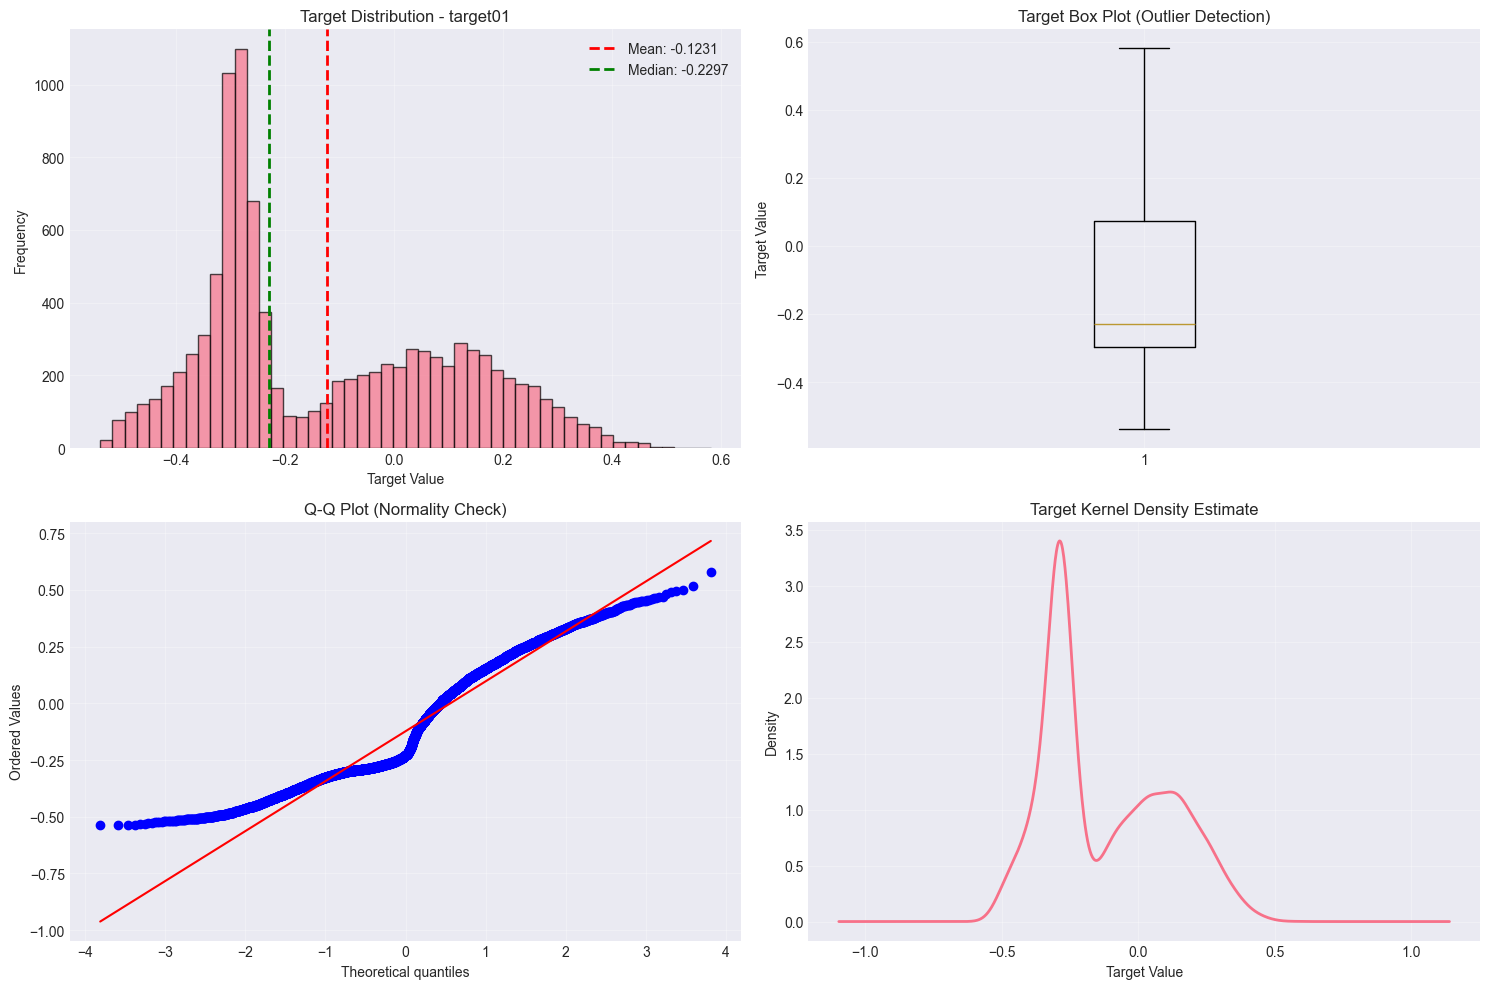

In [12]:
# Visualize target distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(y, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(y.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {y.mean():.4f}')
axes[0, 0].axvline(y.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {y.median():.4f}')
axes[0, 0].set_xlabel('Target Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title(f'Target Distribution - {target_col}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Box plot
axes[0, 1].boxplot(y, vert=True)
axes[0, 1].set_ylabel('Target Value')
axes[0, 1].set_title('Target Box Plot (Outlier Detection)')
axes[0, 1].grid(alpha=0.3)

# Q-Q plot
stats.probplot(y, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normality Check)')
axes[1, 0].grid(alpha=0.3)

# KDE plot
y.plot(kind='density', ax=axes[1, 1], linewidth=2)
axes[1, 1].set_xlabel('Target Value')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Target Kernel Density Estimate')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Feature Distributions & Outliers

**What we're checking:**
- Distribution shape for each feature
- Outliers using IQR method
- Features with extreme values

**Why it matters:**
- Outliers can heavily influence model training
- Non-normal distributions may need transformation
- Helps decide on robust scaling vs standard scaling

In [13]:
# Outlier detection using IQR method
def detect_outliers_iqr(df):
    outlier_summary = []
    
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        outlier_summary.append({
            'Feature': col,
            'Outlier_Count': len(outliers),
            'Outlier_Percentage': (len(outliers) / len(df)) * 100,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound
        })
    
    return pd.DataFrame(outlier_summary).sort_values('Outlier_Count', ascending=False)

outlier_df = detect_outliers_iqr(X_train)

print("="*80)
print("OUTLIER ANALYSIS (IQR Method)")
print("="*80)
print(f"\nFeatures with outliers: {(outlier_df['Outlier_Count'] > 0).sum()}")
print(f"Features with >10% outliers: {(outlier_df['Outlier_Percentage'] > 10).sum()}")
print(f"Features with >25% outliers: {(outlier_df['Outlier_Percentage'] > 25).sum()}")

print("\nTop 20 Features with Most Outliers:")
display(outlier_df[outlier_df['Outlier_Count'] > 0].head(20))

OUTLIER ANALYSIS (IQR Method)

Features with outliers: 230
Features with >10% outliers: 0
Features with >25% outliers: 0

Top 20 Features with Most Outliers:


,Feature,Outlier_Count,Outlier_Percentage,Lower_Bound,Upper_Bound
35,feat_35,101,1.0100,-5.1145,5.6653
1,feat_1,99,0.9900,-4.9978,5.4840
77,feat_77,97,0.9700,-5.0023,5.5689
211,feat_211,94,0.9400,-4.9487,5.7047
69,feat_69,91,0.9100,-5.0810,5.7539
116,feat_116,90,0.9000,-5.0443,5.6566
125,feat_125,90,0.9000,-5.0807,5.6429
208,feat_208,90,0.9000,-5.1305,5.7651
98,feat_98,88,0.8800,-5.0720,5.5344
179,feat_179,87,0.8700,-4.8777,5.7972


In [14]:
# Skewness and kurtosis for all features
skewness_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Skewness': X_train.apply(lambda x: skew(x.dropna())),
    'Kurtosis': X_train.apply(lambda x: kurtosis(x.dropna()))
})

print("\n" + "="*80)
print("FEATURE SKEWNESS & KURTOSIS")
print("="*80)
print(f"\nHighly skewed features (|skew| > 1): {(abs(skewness_df['Skewness']) > 1).sum()}")
print(f"Moderately skewed features (0.5 < |skew| < 1): {((abs(skewness_df['Skewness']) > 0.5) & (abs(skewness_df['Skewness']) <= 1)).sum()}")

print("\nTop 10 Most Positively Skewed:")
display(skewness_df.nlargest(10, 'Skewness'))

print("\nTop 10 Most Negatively Skewed:")
display(skewness_df.nsmallest(10, 'Skewness'))


FEATURE SKEWNESS & KURTOSIS

Highly skewed features (|skew| > 1): 0
Moderately skewed features (0.5 < |skew| < 1): 0

Top 10 Most Positively Skewed:


,Feature,Skewness,Kurtosis
feat_60,feat_60,0.0675,0.0099
feat_86,feat_86,0.0637,-0.0098
feat_39,feat_39,0.0558,0.0366
feat_180,feat_180,0.0533,-0.0215
feat_167,feat_167,0.0517,-0.0030
feat_98,feat_98,0.0472,0.1087
feat_196,feat_196,0.0465,0.0547
feat_241,feat_241,0.0461,-0.0068
feat_181,feat_181,0.0460,0.0490
feat_76,feat_76,0.0459,-0.0120



Top 10 Most Negatively Skewed:


,Feature,Skewness,Kurtosis
feat_198,feat_198,-0.0680,-0.0315
feat_194,feat_194,-0.0663,-0.0503
feat_94,feat_94,-0.0658,0.0359
feat_90,feat_90,-0.0597,0.0282
feat_246,feat_246,-0.0516,0.0180
feat_105,feat_105,-0.0508,-0.0381
feat_132,feat_132,-0.0506,-0.0591
feat_182,feat_182,-0.0489,-0.0219
feat_109,feat_109,-0.0467,0.0078
feat_127,feat_127,-0.0463,-0.0341


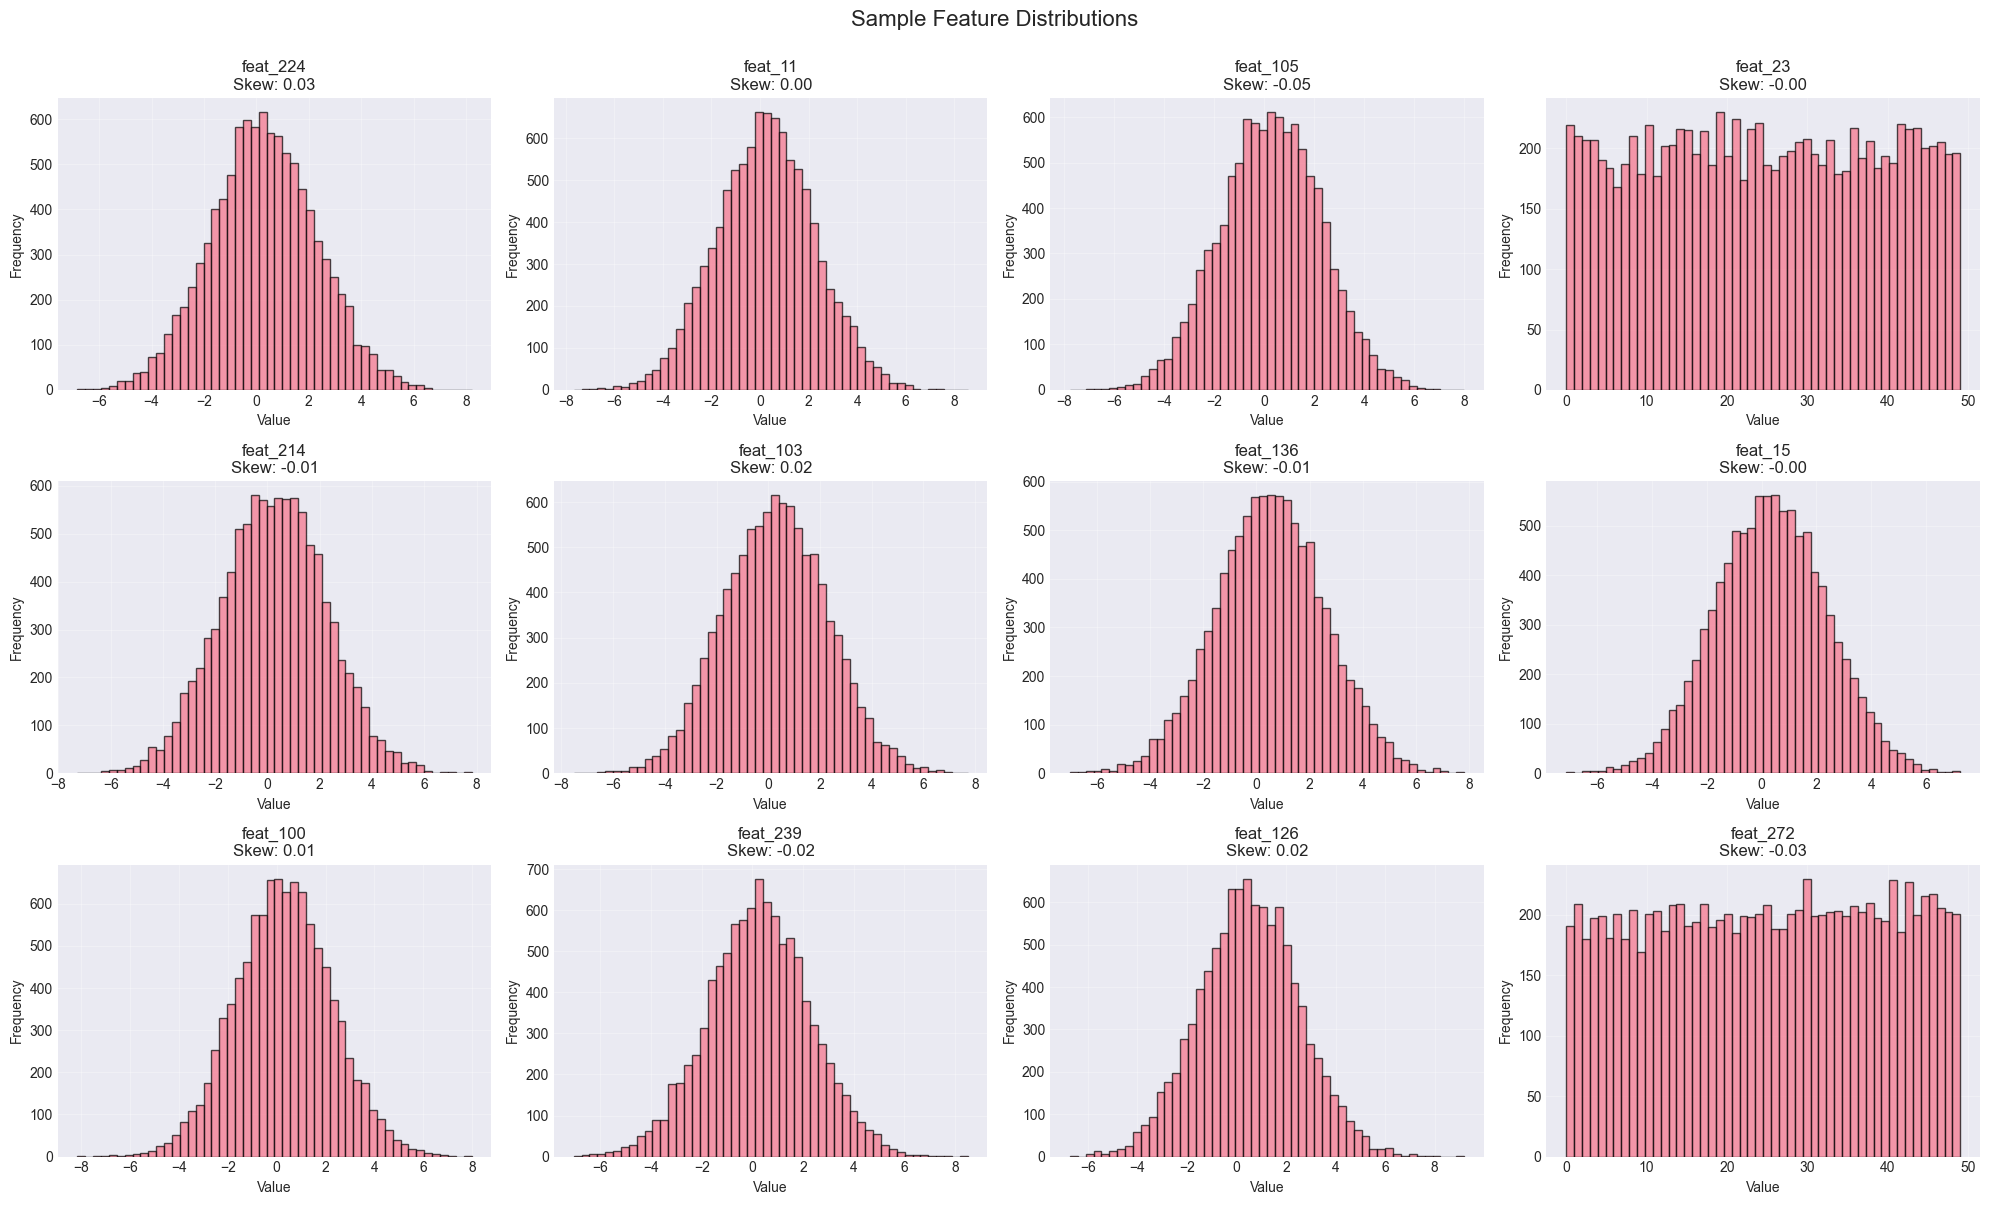

In [15]:
# Visualize distributions of selected features
n_features_to_plot = min(12, X_train.shape[1])
sample_features = np.random.choice(X_train.columns, n_features_to_plot, replace=False)

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.ravel()

for idx, col in enumerate(sample_features):
    axes[idx].hist(X_train[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}\nSkew: {skew(X_train[col].dropna()):.2f}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

plt.suptitle('Sample Feature Distributions', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

## 6. Correlation Analysis

**What we're checking:**
- Correlation between features
- Correlation of features with target
- Multicollinearity detection

**Why it matters:**
- High feature-target correlation = potentially important features
- High feature-feature correlation = redundancy, multicollinearity
- Can inform feature selection/engineering

In [16]:
# Correlation with target
X_train_with_target = X_train.copy()
X_train_with_target['target'] = y.values

target_corr = X_train_with_target.corr()['target'].drop('target').sort_values(ascending=False)

print("="*80)
print("CORRELATION WITH TARGET")
print("="*80)
print("\nTop 20 Positively Correlated Features:")
print(target_corr.head(20))

print("\nTop 20 Negatively Correlated Features:")
print(target_corr.tail(20))

print(f"\nFeatures with |correlation| > 0.5: {(abs(target_corr) > 0.5).sum()}")
print(f"Features with |correlation| > 0.3: {(abs(target_corr) > 0.3).sum()}")
print(f"Features with |correlation| > 0.1: {(abs(target_corr) > 0.1).sum()}")

CORRELATION WITH TARGET

Top 20 Positively Correlated Features:
feat_220   0.1327
feat_160   0.0775
feat_266   0.0714
feat_138   0.0498
feat_203   0.0415
feat_150   0.0325
feat_17    0.0273
feat_125   0.0267
feat_198   0.0264
feat_47    0.0253
feat_153   0.0243
feat_149   0.0230
feat_121   0.0216
feat_40    0.0216
feat_264   0.0209
feat_95    0.0204
feat_2     0.0202
feat_182   0.0192
feat_127   0.0191
feat_158   0.0179
Name: target, dtype: float64

Top 20 Negatively Correlated Features:
feat_111   -0.0202
feat_9     -0.0202
feat_253   -0.0205
feat_252   -0.0206
feat_175   -0.0208
feat_163   -0.0209
feat_110   -0.0211
feat_254   -0.0212
feat_86    -0.0226
feat_191   -0.0236
feat_155   -0.0242
feat_249   -0.0244
feat_102   -0.0251
feat_28    -0.0259
feat_174   -0.0267
feat_228   -0.0274
feat_67    -0.0338
feat_232   -0.0429
feat_221   -0.1582
feat_143   -0.1643
Name: target, dtype: float64

Features with |correlation| > 0.5: 0
Features with |correlation| > 0.3: 0
Features with |correlat

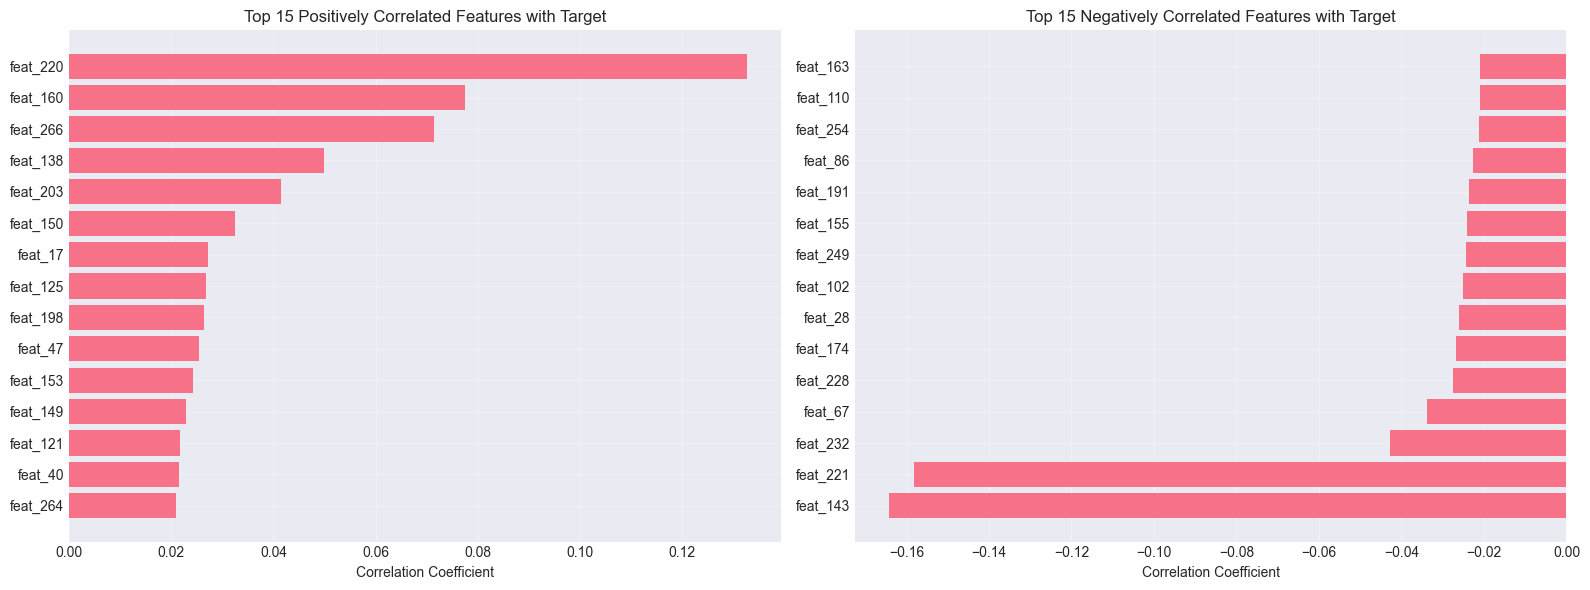

In [17]:
# Visualize top correlations with target
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top positive correlations
top_pos = target_corr.head(15)
axes[0].barh(range(len(top_pos)), top_pos.values)
axes[0].set_yticks(range(len(top_pos)))
axes[0].set_yticklabels(top_pos.index)
axes[0].set_xlabel('Correlation Coefficient')
axes[0].set_title('Top 15 Positively Correlated Features with Target')
axes[0].invert_yaxis()
axes[0].grid(alpha=0.3)

# Top negative correlations
top_neg = target_corr.tail(15)
axes[1].barh(range(len(top_neg)), top_neg.values)
axes[1].set_yticks(range(len(top_neg)))
axes[1].set_yticklabels(top_neg.index)
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_title('Top 15 Negatively Correlated Features with Target')
axes[1].invert_yaxis()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
# Feature-feature correlation (multicollinearity detection)
corr_matrix = X_train.corr().abs()

# Get upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find highly correlated feature pairs
high_corr_pairs = []
for column in upper_triangle.columns:
    high_corr_features = upper_triangle[column][upper_triangle[column] > 0.8]
    for idx in high_corr_features.index:
        high_corr_pairs.append((column, idx, high_corr_features[idx]))

print("\n" + "="*80)
print("MULTICOLLINEARITY DETECTION")
print("="*80)
print(f"\nFeature pairs with correlation > 0.9: {len([p for p in high_corr_pairs if p[2] > 0.9])}")
print(f"Feature pairs with correlation > 0.8: {len(high_corr_pairs)}")

if len(high_corr_pairs) > 0:
    print("\nTop 20 Highly Correlated Feature Pairs (Potential Redundancy):")
    high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])
    display(high_corr_df.sort_values('Correlation', ascending=False).head(20))
else:
    print("\n✓ No highly correlated feature pairs found (correlation > 0.8)")


MULTICOLLINEARITY DETECTION

Feature pairs with correlation > 0.9: 0
Feature pairs with correlation > 0.8: 0

✓ No highly correlated feature pairs found (correlation > 0.8)


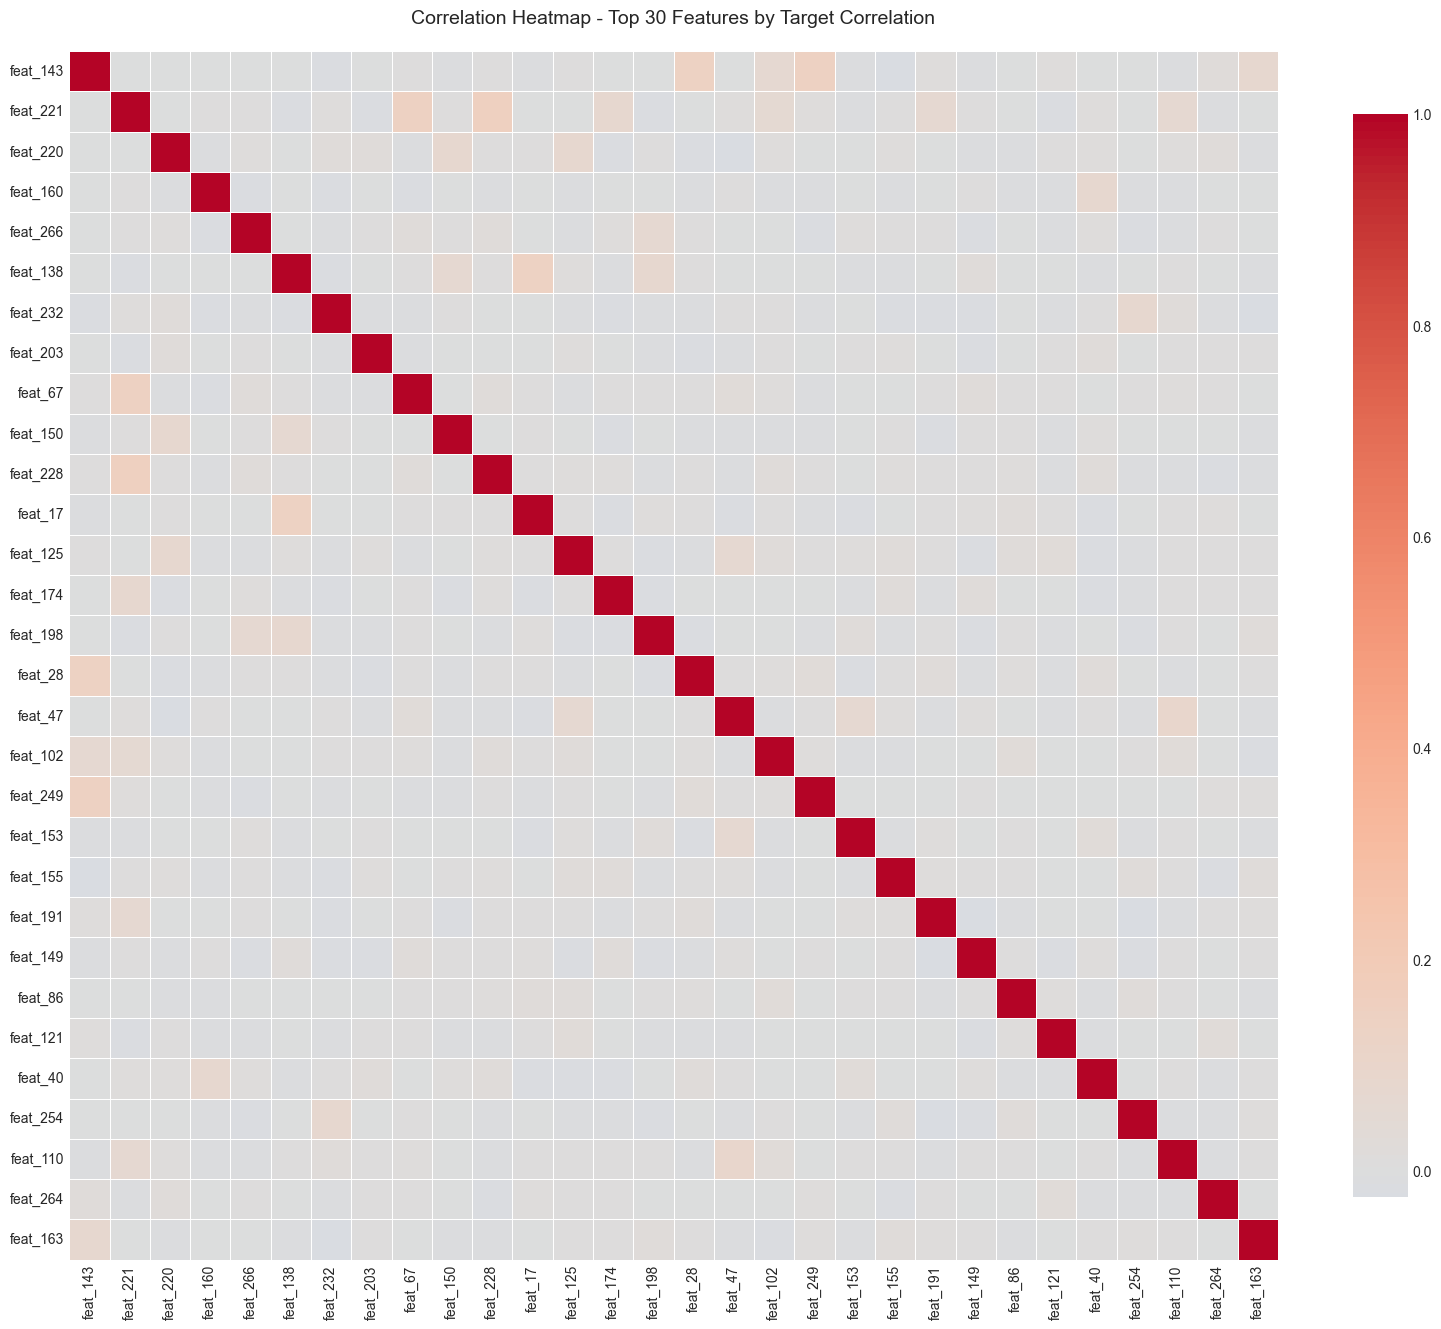

In [19]:
# Visualize correlation heatmap for top features
top_features = abs(target_corr).nlargest(30).index
corr_subset = X_train[top_features].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_subset, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Top 30 Features by Target Correlation', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## 7. Feature Variance & Information

**What we're checking:**
- Variance of each feature
- Near-zero variance features
- Constant or quasi-constant features

**Why it matters:**
- Zero/low variance features provide no information
- Can be removed to reduce dimensionality
- Improves model training speed

In [20]:
# Feature variance analysis
variance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Variance': X_train.var(),
    'Std': X_train.std(),
    'Unique_Values': X_train.nunique(),
    'Unique_Ratio': X_train.nunique() / len(X_train)
}).sort_values('Variance', ascending=True)

print("="*80)
print("FEATURE VARIANCE ANALYSIS")
print("="*80)
print(f"\nFeatures with zero variance: {(variance_df['Variance'] == 0).sum()}")
print(f"Features with very low variance (< 0.01): {(variance_df['Variance'] < 0.01).sum()}")
print(f"Features with < 10 unique values: {(variance_df['Unique_Values'] < 10).sum()}")

print("\n20 Features with Lowest Variance:")
display(variance_df.head(20))

print("\n20 Features with Highest Variance:")
display(variance_df.tail(20))

FEATURE VARIANCE ANALYSIS

Features with zero variance: 0
Features with very low variance (< 0.01): 0
Features with < 10 unique values: 3

20 Features with Lowest Variance:


,Feature,Variance,Std,Unique_Values,Unique_Ratio
feat_55,feat_55,0.0819,0.2862,10000,1.0000
feat_49,feat_49,0.0821,0.2865,10000,1.0000
feat_138,feat_138,0.0823,0.2868,10000,1.0000
feat_202,feat_202,0.0824,0.2871,10000,1.0000
feat_220,feat_220,0.0826,0.2875,10000,1.0000
feat_253,feat_253,0.0828,0.2877,10000,1.0000
feat_164,feat_164,0.0829,0.2880,10000,1.0000
feat_221,feat_221,0.0829,0.2880,10000,1.0000
feat_226,feat_226,0.0830,0.2881,10000,1.0000
feat_89,feat_89,0.0831,0.2883,10000,1.0000



20 Features with Highest Variance:


,Feature,Variance,Std,Unique_Values,Unique_Ratio
feat_101,feat_101,205.2432,14.3263,50,0.0050
feat_112,feat_112,205.2613,14.3269,50,0.0050
feat_240,feat_240,206.2132,14.3601,50,0.0050
feat_237,feat_237,206.6025,14.3737,50,0.0050
feat_192,feat_192,207.1230,14.3918,50,0.0050
feat_157,feat_157,207.3768,14.4006,50,0.0050
feat_184,feat_184,207.8334,14.4164,50,0.0050
feat_272,feat_272,208.3483,14.4343,50,0.0050
feat_73,feat_73,208.5960,14.4429,50,0.0050
feat_238,feat_238,208.7529,14.4483,50,0.0050


In [21]:
# Constant and quasi-constant features
constant_features = variance_df[variance_df['Variance'] == 0]['Feature'].tolist()
quasi_constant_features = variance_df[(variance_df['Unique_Ratio'] < 0.01) & (variance_df['Variance'] > 0)]['Feature'].tolist()

print("\n" + "="*80)
print("CONSTANT & QUASI-CONSTANT FEATURES")
print("="*80)
print(f"\nConstant features (0 variance): {len(constant_features)}")
if len(constant_features) > 0:
    print("  Features:", constant_features[:10], "..." if len(constant_features) > 10 else "")

print(f"\nQuasi-constant features (<1% unique values): {len(quasi_constant_features)}")
if len(quasi_constant_features) > 0:
    print("  Features:", quasi_constant_features[:10], "..." if len(quasi_constant_features) > 10 else "")

print(f"\n💡 Recommendation: Consider removing {len(constant_features) + len(quasi_constant_features)} low-information features")


CONSTANT & QUASI-CONSTANT FEATURES

Constant features (0 variance): 0

Quasi-constant features (<1% unique values): 23
  Features: ['feat_24', 'feat_104', 'feat_131', 'feat_101', 'feat_112', 'feat_240', 'feat_237', 'feat_192', 'feat_157', 'feat_184'] ...

💡 Recommendation: Consider removing 23 low-information features


## 8. Data Quality Checks

**What we're checking:**
- Duplicate rows
- Infinite values
- Data type consistency
- Train/eval feature alignment

**Why it matters:**
- Duplicates can cause data leakage
- Infinite values break many algorithms
- Feature mismatch causes prediction errors

In [22]:
# Duplicate detection
print("="*80)
print("DATA QUALITY CHECKS")
print("="*80)

# Duplicates in X_train
n_duplicates = X_train.duplicated().sum()
print(f"\nDuplicate rows in X_train: {n_duplicates}")
if n_duplicates > 0:
    print(f"  → {n_duplicates / len(X_train) * 100:.2f}% of dataset")
    print("  ⚠️ Consider removing duplicates")
else:
    print("  ✓ No duplicates found")

# Duplicates in target
combined = pd.concat([X_train, y_train], axis=1)
n_duplicates_with_target = combined.duplicated().sum()
print(f"\nDuplicate rows (features + target): {n_duplicates_with_target}")
if n_duplicates_with_target > 0:
    print(f"  → {n_duplicates_with_target / len(combined) * 100:.2f}% of dataset")
else:
    print("  ✓ No duplicates found")

DATA QUALITY CHECKS

Duplicate rows in X_train: 0
  ✓ No duplicates found

Duplicate rows (features + target): 0
  ✓ No duplicates found


In [23]:
# Check for infinite values
inf_counts = np.isinf(X_train.select_dtypes(include=[np.number])).sum()
features_with_inf = inf_counts[inf_counts > 0]

print("\n" + "="*80)
print("INFINITE VALUES CHECK")
print("="*80)
if len(features_with_inf) > 0:
    print(f"\n⚠️ Found infinite values in {len(features_with_inf)} features:")
    display(features_with_inf)
else:
    print("\n✓ No infinite values found")


INFINITE VALUES CHECK

✓ No infinite values found


In [24]:
# Train/Eval feature alignment
print("\n" + "="*80)
print("TRAIN/EVAL FEATURE ALIGNMENT")
print("="*80)

train_features = set(X_train.columns)
eval_features = set(X_eval.columns)

missing_in_eval = train_features - eval_features
missing_in_train = eval_features - train_features

print(f"\nFeatures in train: {len(train_features)}")
print(f"Features in eval: {len(eval_features)}")

if len(missing_in_eval) > 0:
    print(f"\n⚠️ Features in train but NOT in eval: {len(missing_in_eval)}")
    print(f"  {list(missing_in_eval)[:10]}")
else:
    print("\n✓ All train features present in eval")

if len(missing_in_train) > 0:
    print(f"\n⚠️ Features in eval but NOT in train: {len(missing_in_train)}")
    print(f"  {list(missing_in_train)[:10]}")
else:
    print("✓ All eval features present in train")

if list(X_train.columns) == list(X_eval.columns):
    print("\n✓ Feature order is identical in train and eval")
else:
    print("\n⚠️ Feature order differs between train and eval")


TRAIN/EVAL FEATURE ALIGNMENT

Features in train: 273
Features in eval: 273

✓ All train features present in eval
✓ All eval features present in train

✓ Feature order is identical in train and eval


## 9. Advanced Statistics

**What we're checking:**
- Feature relationships (scatter plots)
- Non-linear relationships
- Feature interactions

**Why it matters:**
- Linear models may miss non-linear patterns
- Feature interactions can be engineered
- Helps choose appropriate model type

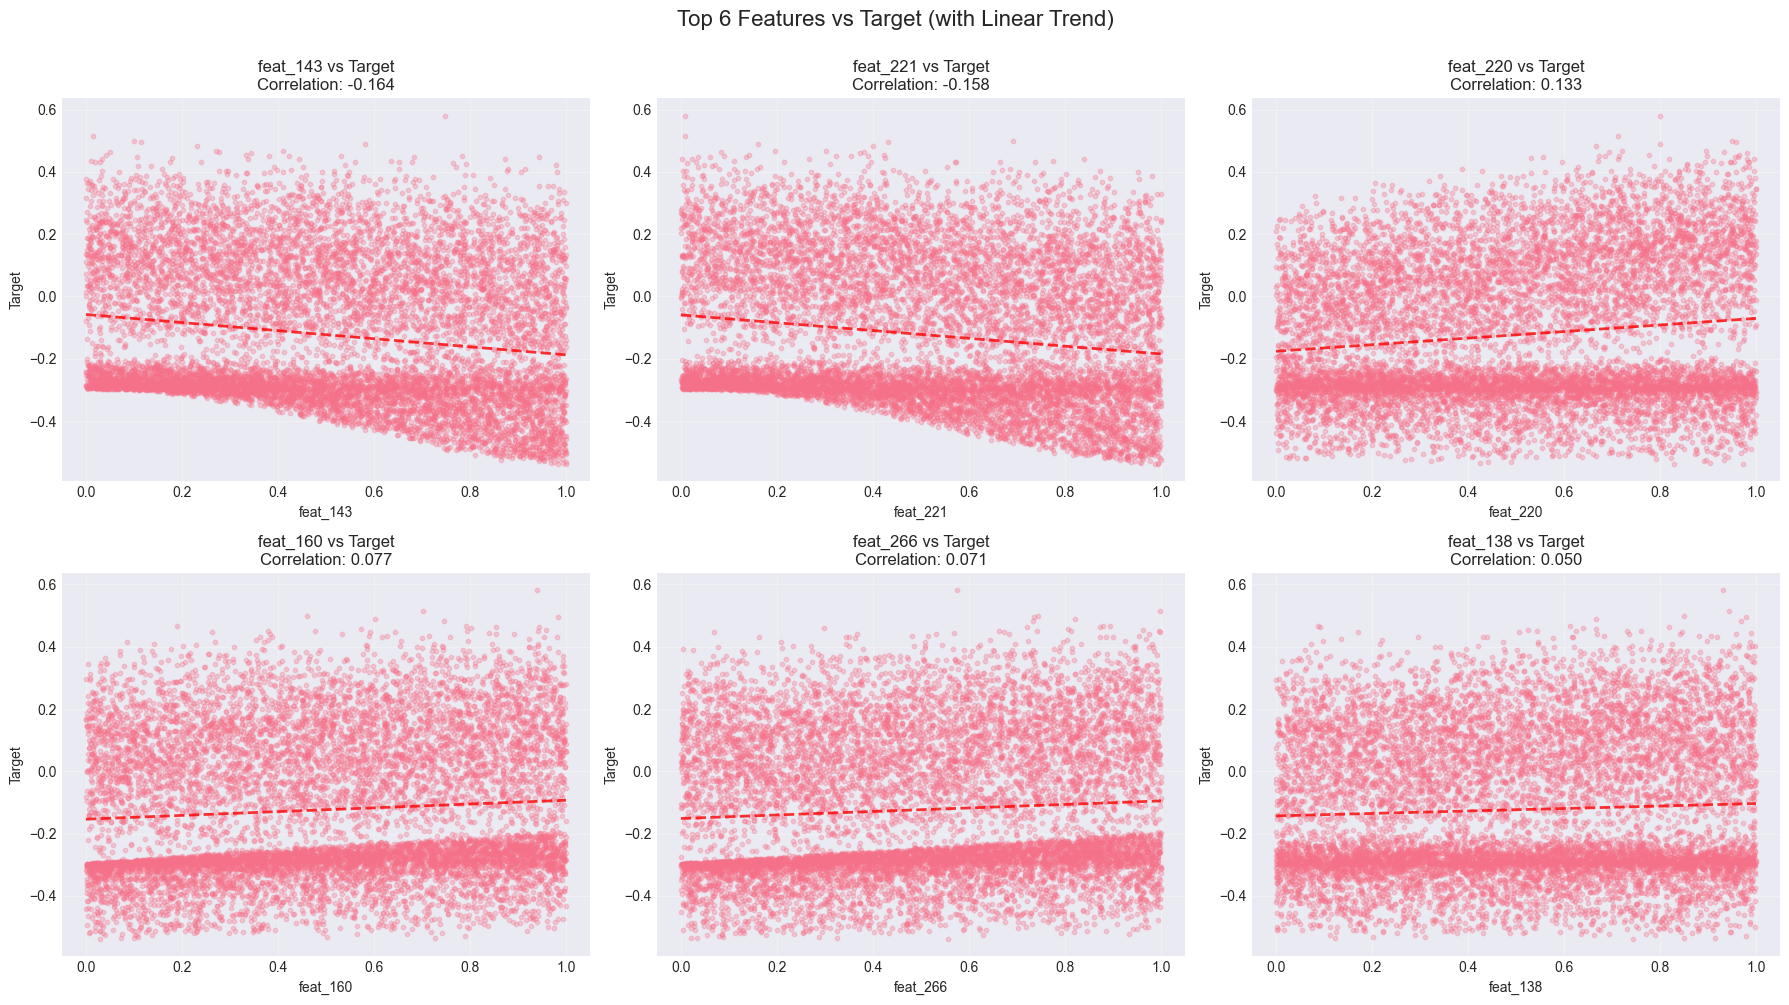

In [25]:
# Scatter plots of top correlated features vs target
top_features_for_scatter = abs(target_corr).nlargest(6).index

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features_for_scatter):
    axes[idx].scatter(X_train[feature], y, alpha=0.3, s=10)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Target')
    axes[idx].set_title(f'{feature} vs Target\nCorrelation: {target_corr[feature]:.3f}')
    axes[idx].grid(alpha=0.3)
    
    # Add trend line
    z = np.polyfit(X_train[feature].dropna(), y[X_train[feature].notna()], 1)
    p = np.poly1d(z)
    axes[idx].plot(X_train[feature].sort_values(), p(X_train[feature].sort_values()), 
                   "r--", alpha=0.8, linewidth=2)

plt.suptitle('Top 6 Features vs Target (with Linear Trend)', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

## 10. Feature Engineering Insights

**What we're checking:**
- Potential transformations
- Feature combinations
- Dimensionality reduction candidates

**Why it matters:**
- Guides feature engineering strategy
- Identifies redundant features
- Suggests preprocessing steps

In [26]:
# Summary recommendations
print("="*80)
print("FEATURE ENGINEERING & PREPROCESSING RECOMMENDATIONS")
print("="*80)

print("\n1. MISSING VALUES:")
features_with_missing = (missing_train > 0).sum()
if features_with_missing > 0:
    print(f"   → {features_with_missing} features have missing values")
    print("   → Recommendation: Use median imputation (already implemented)")
else:
    print("   ✓ No missing values")

print("\n2. SCALING:")
print(f"   → Feature ranges vary significantly (min range: {feature_ranges['Range'].min():.2e}, max range: {feature_ranges['Range'].max():.2e})")
print("   → Recommendation: StandardScaler (already implemented) ✓")

print("\n3. SKEWNESS:")
highly_skewed = (abs(skewness_df['Skewness']) > 1).sum()
if highly_skewed > 0:
    print(f"   → {highly_skewed} features are highly skewed (|skew| > 1)")
    print("   → Recommendation: Consider log/sqrt transformation for skewed features")
else:
    print("   ✓ Most features are approximately symmetric")

print("\n4. OUTLIERS:")
features_with_outliers = (outlier_df['Outlier_Percentage'] > 5).sum()
if features_with_outliers > 0:
    print(f"   → {features_with_outliers} features have >5% outliers")
    print("   → Recommendation: Tree-based models (LightGBM, CatBoost) handle outliers well ✓")
else:
    print("   ✓ Few outliers detected")

print("\n5. MULTICOLLINEARITY:")
if len(high_corr_pairs) > 0:
    print(f"   → {len(high_corr_pairs)} feature pairs have correlation > 0.8")
    print("   → Recommendation: Consider PCA or feature selection")
else:
    print("   ✓ No severe multicollinearity detected")

print("\n6. LOW VARIANCE:")
low_var_features = len(constant_features) + len(quasi_constant_features)
if low_var_features > 0:
    print(f"   → {low_var_features} constant/quasi-constant features")
    print("   → Recommendation: Remove these features to reduce dimensionality")
else:
    print("   ✓ No low-variance features")

print("\n7. TARGET DISTRIBUTION:")
if abs(skew(y)) > 0.5:
    print(f"   → Target is skewed (skewness: {skew(y):.3f})")
    print("   → Recommendation: Consider log transformation if RMSE evaluation")
else:
    print("   ✓ Target is approximately normal")

print("\n8. DIMENSIONALITY:")
print(f"   → {X_train.shape[1]} features for {X_train.shape[0]} samples")
print(f"   → Sample-to-feature ratio: {X_train.shape[0] / X_train.shape[1]:.1f}:1")
if X_train.shape[0] / X_train.shape[1] < 10:
    print("   → ⚠️ Low sample-to-feature ratio may cause overfitting")
    print("   → Recommendation: Strong regularization needed (L2, dropout, etc.)")
else:
    print("   ✓ Adequate samples per feature")

print("\n" + "="*80)
print("END OF EXPLORATORY DATA ANALYSIS")
print("="*80)

FEATURE ENGINEERING & PREPROCESSING RECOMMENDATIONS

1. MISSING VALUES:
   ✓ No missing values

2. SCALING:
   → Feature ranges vary significantly (min range: 9.99e-01, max range: 4.90e+01)
   → Recommendation: StandardScaler (already implemented) ✓

3. SKEWNESS:
   ✓ Most features are approximately symmetric

4. OUTLIERS:
   ✓ Few outliers detected

5. MULTICOLLINEARITY:
   ✓ No severe multicollinearity detected

6. LOW VARIANCE:
   → 23 constant/quasi-constant features
   → Recommendation: Remove these features to reduce dimensionality

7. TARGET DISTRIBUTION:
   ✓ Target is approximately normal

8. DIMENSIONALITY:
   → 273 features for 10000 samples
   → Sample-to-feature ratio: 36.6:1
   ✓ Adequate samples per feature

END OF EXPLORATORY DATA ANALYSIS
